# Path Modelling

In this exercise, we will revisit the Cleveland Heart Disease dataset, which we already explored in the categorical regression session. This dataset is widely used in medical research and machine learning for predicting heart disease. It includes data from patients with suspected heart conditions and features a variety of clinical and demographic attributes.

As done before, we first load the dataset and combine features (predictors) and targets into a single DataFrame, before having a look at it:

In [19]:
import pandas as pd
import semopy
from semopy import calc_stats
from ucimlrepo import fetch_ucirepo
  
# Fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# Get data (they already are DataFrames) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Create a combined DataFrame
df = pd.concat([X, y], axis=1)

print(df.describe())
print(df.head())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

## Exercise 1: Path Modelling

For this exercise, you will investigate the following hypotheses:

1. `age` directly affects heart disease presence (`num`)
2. Cholesterol (`chol`) and resting blood pressure (`trestbps`) mediate the realtionship between `age` and `num`
3. Max heart rate achieved (`thalach`) and exercise-induced angina (`exang`) have direct effects on heart disease (`num`).

*Additional information: The `num` variable is a categorical variable with values ranging from 0 to 4, where 0 indicates no heart disease, and 1 to 4 indicate the presence of heart disease, with increasing severity.*

Your tasks therefore are:

1. Create and fit a path model for the stated hypotheses.
2. Print and interpret the relevant results
3. Create the path diagram and check if you did everything correctly.

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.283
Number of iterations: 32
Params: 0.006 0.001 0.008 -0.015 0.720 0.554 1.197 1353.233 1.116 290.727
       lval  op      rval     Estimate  Est. Std    Std. Err    z-value  \
0  trestbps   ~       age     0.554256  0.281469    0.108551   5.105937   
1      chol   ~       age     1.196650  0.281656    0.234196   5.109621   
2       num   ~       age     0.006412  0.047124    0.007846   0.817216   
3       num   ~      chol     0.000686  0.021428    0.001650   0.415975   
4       num   ~  trestbps     0.007657  0.110819    0.003559   2.151459   
5       num   ~   thalach    -0.015432 -0.287044    0.003117  -4.951595   
6       num   ~     exang     0.719554  0.274881    0.140075   5.136928   
7      chol  ~~      chol  1353.232783  0.920670  109.942648  12.308534   
8  trestbps  ~~  trestbps   290.727227  0.920775   23.619973  12.308534   
9       num  ~~ 

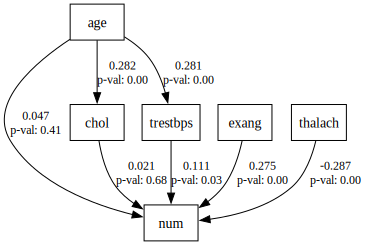

In [21]:
# Define and fit the model
model = semopy.Model("""
                     num ~ age + chol + trestbps + thalach + exang
                     trestbps ~ age 
                     chol ~ age
                     """)

# Print information about the fitting process
info = model.fit(df)
print(info)

# Print the model estimates
estimates = model.inspect(std_est=True)
print(estimates)

# Print the model fit statistics
stats = calc_stats(model)
print(stats)

# Show and save the model figure
semopy.semplot(model, "figures/heart_disease_model.png", std_ests=True)


## Exercise 2: Quiz

In [ ]:
from jupyterquiz import display_quiz

display_quiz('https://raw.githubusercontent.com/mibur1/psy111/main/book/solutions/quiz/question3.json')
display_quiz('https://raw.githubusercontent.com/mibur1/psy111/main/book/solutions/quiz/question4.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>